# Modeling

We are going to be modeling students information to try predict their 'Calculus' grade the first time they take the subject.

In [1]:
#Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

import os
from sys import platform

In [2]:
#Linear models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [4]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [5]:
import statsmodels.api as sm
import numpy as np

In [6]:
df = pd.read_csv('../data/processed/final_merge_model.csv')

In [7]:
df['assignatura'].value_counts()

assignatura
Antr         977
EMedi        975
Calc         975
Fis          965
FisEl        946
Mates        941
Quim         936
EGraf        869
Inf          854
Emp          774
Estad         54
FETF          45
CTMat         41
OTGP          40
AMCI          37
EtiPr         30
ReMa          30
TeoMM         28
OrgEm         27
SisEn         27
EEcFi         24
DTacO         22
TCEE          20
VBB           17
TIC           17
RegAu         16
Etcn-MaqE     15
TElEn         13
SPrIn         11
AutIn         10
InfIn         10
EnPo           9
TeMec          9
EnDiM          9
TecEn          9
InsEn          9
LinEl          7
IEMAT          7
IEBT           6
EPrFa          5
MePr           5
CEiER          5
DEstO          4
PTeIn          4
GQual          4
SiElP          4
AEGra          4
TECIn          3
TecDE          3
MecMC          3
EngFT          2
MMTer          2
IdAng          2
DisMM          2
IdAle          2
TCir           2
MacrE          2
MQG            1
DE

In [8]:
df = df[df['assignatura'] == 'Calc']
df = df.groupby('NIA').first().reset_index()

In [9]:
df.shape

(973, 27)

In [10]:
df.columns

Index(['NIA', 'nota_acces', 'ordre_assignacio', 'orientacio',
       'aspectes_eleccio', 'estudis_pare', 'estudis_mare', 'ocupacio_pare',
       'ocupacio_mare', 'edad', 'diferencia_anys', 'renta_media_disponible',
       'tipus_centre_secundaria', 'H', 'D', 'via_acces_PAU', 'via_acces_CFGS',
       'via_acces_altres_vies', 'juny', 'setembre', 'altres_convocatories',
       'mati', 'tarda', 'treball_remunerat', 'assignatura', 'nota_numerica',
       'nota_alfa'],
      dtype='object')

## Predicting numeric grade (Regression model)

In [11]:
df.columns

Index(['NIA', 'nota_acces', 'ordre_assignacio', 'orientacio',
       'aspectes_eleccio', 'estudis_pare', 'estudis_mare', 'ocupacio_pare',
       'ocupacio_mare', 'edad', 'diferencia_anys', 'renta_media_disponible',
       'tipus_centre_secundaria', 'H', 'D', 'via_acces_PAU', 'via_acces_CFGS',
       'via_acces_altres_vies', 'juny', 'setembre', 'altres_convocatories',
       'mati', 'tarda', 'treball_remunerat', 'assignatura', 'nota_numerica',
       'nota_alfa'],
      dtype='object')

In [12]:
df_num = df[['nota_acces', 'ordre_assignacio', 'orientacio',
       'aspectes_eleccio', 'estudis_pare', 'estudis_mare', 'ocupacio_pare',
       'ocupacio_mare', 'edad', 'diferencia_anys', 'renta_media_disponible',
       'tipus_centre_secundaria', 'H', 'D', 'via_acces_PAU', 'via_acces_CFGS',
       'via_acces_altres_vies', 'juny', 'setembre', 'altres_convocatories',
       'mati', 'tarda', 'treball_remunerat','nota_numerica']]

In [13]:
def many_models_at_once (df, test_size=0.20):
    
    X = df.iloc[:,:-1]
    y = df['nota_numerica']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
    models = {
       "lr": LinearRegression(),
        "ridge": Ridge(), 
        "lasso": Lasso(), 
       "elastic": ElasticNet(),
        "knn": KNeighborsRegressor(),
         "decisiontreeregressor": DecisionTreeRegressor(),
        "grad": GradientBoostingRegressor(), 
        "randomforestregressor": RandomForestRegressor(), 
        "xgbregressor" : XGBRegressor()
    }

    for model in models.values():
        model.fit(X_train, y_train)

    for name, model in models.items():
        y_pred = model.predict(X_test)
        print(f"------------{name}------------\n")
        print(f"MAE, error: {metrics.mean_absolute_error(y_test, y_pred)}")
        print(f"MSE, error: {metrics.mean_squared_error(y_test, y_pred)}")
        print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
        print(f"r2: {metrics.r2_score(y_test, y_pred)}")
        print("\n")
        
many_models_at_once (df_num, test_size = 0.2)

------------lr------------

MAE, error: 2.017914353671347
MSE, error: 6.358971489673364
RMSE, error: 2.5217001189025954
r2: 0.1799803232668593


------------ridge------------

MAE, error: 2.0224548172167034
MSE, error: 6.3771733858967075
RMSE, error: 2.5253065924550047
r2: 0.1776331020092652


------------lasso------------

MAE, error: 2.210322162269857
MSE, error: 7.072401827392383
RMSE, error: 2.6593987717889136
r2: 0.08798008142617508


------------elastic------------

MAE, error: 2.1670235526501695
MSE, error: 6.803386011290952
RMSE, error: 2.6083301193083193
r2: 0.12267095288452934


------------knn------------

MAE, error: 2.634051282051282
MSE, error: 10.29998358974359
RMSE, error: 3.2093587505518277
r2: -0.32823196759638873


------------decisiontreeregressor------------

MAE, error: 2.7974358974358973
MSE, error: 13.692461538461536
RMSE, error: 3.700332625381337
r2: -0.7657081656497466


------------grad------------

MAE, error: 2.1465289765931783
MSE, error: 7.275613902345005

In [14]:
#Linear
X = df_num.iloc[:,:-1]
y = df_num['nota_numerica']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train, y_train)

# Just for feedback
if platform == "darwin":
    os.system("say I'm done training")

y_pred = lr.predict(X_test)
lr_coefficients = lr.coef_
np.sqrt(mean_squared_error(y_pred, y_test))

2.6129604474786823

In [15]:
features = X.columns

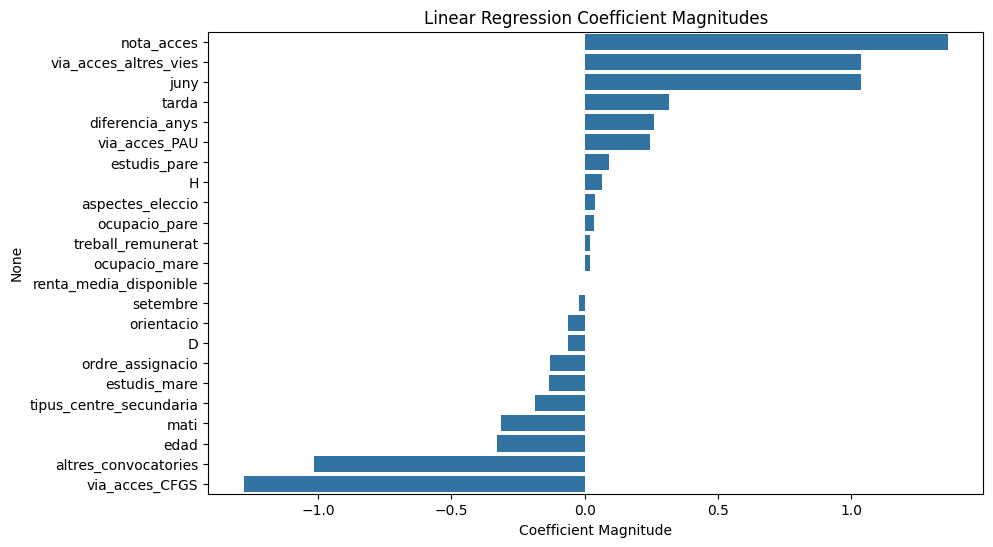

In [16]:
feature_importance_lr = pd.Series(lr_coefficients, index=features)
feature_importance_lr = feature_importance_lr.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_lr, y=feature_importance_lr.index)
plt.title('Linear Regression Coefficient Magnitudes')
plt.xlabel('Coefficient Magnitude')
plt.show()

In [17]:
#In the future we can try again eliminating the variables that have minimum importance

In [18]:
#We only can explain 0.23 of the variance

## Predicting nota_alfa (categoric)

### Multiple categories

In [53]:
df_cat = pd.read_csv('../data/processed/final_merge_nota_alfa.csv')

In [54]:
df_cat = df_cat[df_cat['assignatura'] == 'Calc']

In [65]:
df_cat = df_cat[['nota_acces', 'ordre_assignacio', 'orientacio',
       'aspectes_eleccio', 'estudis_pare', 'estudis_mare', 'ocupacio_pare',
       'ocupacio_mare', 'edad', 'diferencia_anys',
       'tipus_centre_secundaria', 'H', 'D', 'via_acces_PAU', 'via_acces_CFGS',
     'altres_convocatories',
       'mati', 'tarda', 'treball_remunerat','nota_alfa']]

In [66]:
df_cat['nota_alfa'].value_counts()

nota_alfa
2    302
1    263
3    214
0    150
5     33
4     13
Name: count, dtype: int64

In [67]:
# ------------random_forest------------

# Accuracy: 0.7282051282051282
# Precision: 0.731054131054131
# Recall: 0.7282051282051282
# F1 Score: 0.7291511597811632

In [68]:
#with 6 categories
def many_models_at_once (df, test_size=0.20):
    
    X = df.iloc[:,:-1]
    y = df['nota_alfa']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
    classifier_models = {
        "logistic_regression": LogisticRegression(),
        "knn": KNeighborsClassifier(),
        "decision_tree": DecisionTreeClassifier(),
        "random_forest": RandomForestClassifier(),
        "gradient_boosting": GradientBoostingClassifier(),
        "svm": SVC(),
        "xgboost": XGBClassifier()
    }

    for model in classifier_models.values():
        model.fit(X_train, y_train)
        
    for name, model in classifier_models.items():
        y_pred = model.predict(X_test)
        print(f"------------{name}------------\n")
        print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
        print(f"Precision: {metrics.precision_score(y_test, y_pred, average='weighted')}")
        print(f"Recall: {metrics.recall_score(y_test, y_pred, average='weighted')}")
        print(f"F1 Score: {metrics.f1_score(y_test, y_pred, average='weighted')}")
        print("\n")
        
        
many_models_at_once (df_cat, test_size = 0.2)

C:\Users\Usuario\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------------logistic_regression------------

Accuracy: 0.3641025641025641
Precision: 0.3419729842806766
Recall: 0.3641025641025641
F1 Score: 0.3391085268465742


------------knn------------

Accuracy: 0.30256410256410254
Precision: 0.2870940439102648
Recall: 0.30256410256410254
F1 Score: 0.29094854026882067


------------decision_tree------------

Accuracy: 0.3128205128205128
Precision: 0.3290082494337813
Recall: 0.3128205128205128
F1 Score: 0.31832575287995746


------------random_forest------------

Accuracy: 0.36923076923076925
Precision: 0.32920311714429357
Recall: 0.36923076923076925
F1 Score: 0.34591205067822056


------------gradient_boosting------------

Accuracy: 0.35384615384615387
Precision: 0.3391061704029776
Recall: 0.35384615384615387
F1 Score: 0.34436278346534754


------------svm------------

Accuracy: 0.35384615384615387
Precision: 0.27259259259259255
Recall: 0.35384615384615387
F1 Score: 0.22095297415135473


------------xgboost------------

Accuracy: 0.34871794871794

C:\Users\Usuario\miniconda3\envs\ironhack\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\miniconda3\envs\ironhack\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\miniconda3\envs\ironhack\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
X = df_cat.iloc[:,:-1]
y = df_cat['nota_alfa']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)

# Just for feedback
if platform == "darwin":
    os.system("say I'm done training")

y_pred = gradient_boosting.predict(X_test)

In [70]:
np.sqrt(mean_squared_error(y_pred, y_test))

1.3320506650870958

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Get feature importances
feature_importances = gradient_boosting.feature_importances_

# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the results
print(importances_df)

                    Feature  Importance
0                nota_acces    0.476127
8                      edad    0.055468
5              estudis_mare    0.048598
4              estudis_pare    0.048111
6             ocupacio_pare    0.047534
3          aspectes_eleccio    0.046358
9           diferencia_anys    0.044423
2                orientacio    0.043445
7             ocupacio_mare    0.038318
10  tipus_centre_secundaria    0.033921
20        treball_remunerat    0.030301
1          ordre_assignacio    0.026076
17     altres_convocatories    0.015812
19                    tarda    0.009426
11                        H    0.007597
14           via_acces_CFGS    0.007551
12                        D    0.006499
13            via_acces_PAU    0.005996
18                     mati    0.004815
16                 setembre    0.002721
15                     juny    0.000905


### Predicting Pass / No Pass

In [83]:
df_cat2 = pd.read_csv('../data/processed/final_merge_nota_alfa_binary.csv')

In [84]:
df_cat2 = df_cat2[df_cat2['assignatura'] == 'Calc']

In [85]:
df_cat2 = df_cat2[['nota_acces', 'ordre_assignacio', 'orientacio',
       'aspectes_eleccio', 'estudis_pare', 'estudis_mare', 'ocupacio_pare',
       'ocupacio_mare', 'edad', 'diferencia_anys',
       'tipus_centre_secundaria', 'H', 'D', 'via_acces_PAU', 'via_acces_CFGS',
     'altres_convocatories',
       'mati', 'tarda', 'treball_remunerat','nota_alfa']]

In [86]:
df_cat2['nota_alfa'].value_counts()

nota_alfa
1    562
0    413
Name: count, dtype: int64

In [87]:
#with 2 categories
def many_models_at_once (df, test_size=0.20):
    
    X = df.iloc[:,:-1]
    y = df['nota_alfa']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
    classifier_models = {
        "logistic_regression": LogisticRegression(),
        "knn": KNeighborsClassifier(),
        "decision_tree": DecisionTreeClassifier(),
        "random_forest": RandomForestClassifier(),
        "gradient_boosting": GradientBoostingClassifier(),
        "svm": SVC(),
        "xgboost": XGBClassifier()
    }

    for model in classifier_models.values():
        model.fit(X_train, y_train)
        
    for name, model in classifier_models.items():
        y_pred = model.predict(X_test)
        print(f"------------{name}------------\n")
        print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
        print(f"Precision: {metrics.precision_score(y_test, y_pred, average='weighted')}")
        print(f"Recall: {metrics.recall_score(y_test, y_pred, average='weighted')}")
        print(f"F1 Score: {metrics.f1_score(y_test, y_pred, average='weighted')}")
        print("\n")
        
        
many_models_at_once (df_cat, test_size = 0.2)

C:\Users\Usuario\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------------logistic_regression------------

Accuracy: 0.3435897435897436
Precision: 0.31191567092135336
Recall: 0.3435897435897436
F1 Score: 0.3232672942682819


------------knn------------

Accuracy: 0.2717948717948718
Precision: 0.24635090699999423
Recall: 0.2717948717948718
F1 Score: 0.24478791409181902


------------decision_tree------------

Accuracy: 0.29743589743589743
Precision: 0.2997495336282951
Recall: 0.29743589743589743
F1 Score: 0.2963839922785816


------------random_forest------------

Accuracy: 0.3333333333333333
Precision: 0.30932292043403153
Recall: 0.3333333333333333
F1 Score: 0.3178187099755727


------------gradient_boosting------------

Accuracy: 0.3076923076923077
Precision: 0.3112918660287081
Recall: 0.3076923076923077
F1 Score: 0.3055197893075564


------------svm------------

Accuracy: 0.31794871794871793
Precision: 0.15726495726495726
Recall: 0.31794871794871793
F1 Score: 0.1897509262316129


------------xgboost------------

Accuracy: 0.3435897435897436
Pre

C:\Users\Usuario\miniconda3\envs\ironhack\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\miniconda3\envs\ironhack\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\miniconda3\envs\ironhack\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\miniconda3\envs\ironhack\L

In [ ]:
# for column in df.columns[:-1]:  # Exclude the last column (target variable)
#     sns.regplot(y=column, x='nota_numerica', data=df, scatter_kws={'s': 10})
#     plt.title(f'Regression Plot for {column} vs. y')
#     plt.xlabel('nota_numerica')
#     plt.ylabel(column)
#     plt.axvline(5, c="r", linestyle="--")
#     plt.show()

In [ ]:
# for column in df.columns[:-1]:  # Exclude the last column (target variable)
#     X_current = df[column]
#     X_with_const = sm.add_constant(X_current)
    
#     # Fit the OLS model
#     model = sm.OLS(y, X_with_const)
#     results = model.fit()
    
#     # Print R-squared and Adjusted R-squared
#     print(f'Results for {column}:')
#     print(f'R-squared: {results.rsquared:.4f}')
#     print(f'Adjusted R-squared: {results.rsquared_adj:.4f}')
#     print('\n')

In [ ]:
#comparar modelo regresion y modelo clasificación (manualmente )